# Production companies and production countries

This notebook is used to aggregate performances of different production companies and production countries. This is interesting because 

In [1]:
import sys
import os
from tqdm import tqdm
import numpy as np

sys.path.insert(0, os.path.abspath('../utils/')) #point this to the where util is relatively to your working directory

from util import *
from util import get_averages_for_columns

data_dir = get_path_to_data_dir()

Getting the cleaned dataset

In [2]:
movie_details_neat = pd.read_pickle(data_dir + 'pre-processed/movie_details_neat.pkl')

movie_details_neat.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,genres,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,movie_id,cast,crew
0,105000000,64682,61.196071,351040419,143.0,7.3,3769,"{'id': [18, 10749], 'name': ['Drama', 'Romance']}","{'id': [818, 1326, 1523, 3929, 209714], 'name'...",en,The Great Gatsby,An adaptation of F. Scott Fitzgerald's Long Is...,"{'name': ['Village Roadshow Pictures', 'Bazmar...","{'iso_3166_1': ['US', 'AU'], 'name': ['United ...",2013-05-10,"{'iso_639_1': ['en'], 'name': ['English']}",64682,"{'cast_id': [2, 5, 3, 8, 6, 4, 7, 22, 13, 23, ...","{'credit_id': ['52fe46e3c3a368484e0a982d', '52..."
1,150000000,9543,62.169881,335154643,116.0,6.2,2317,"{'id': [12, 14, 28, 10749], 'name': ['Adventur...","{'id': [1241, 1965, 12653, 12654, 12655, 41645...",en,Prince of Persia: The Sands of Time,A rogue prince reluctantly joins forces with a...,"{'name': ['Walt Disney Pictures', 'Jerry Bruck...","{'iso_3166_1': ['US'], 'name': ['United States...",2010-05-19,"{'iso_639_1': ['en'], 'name': ['English']}",9543,"{'cast_id': [5, 2, 7, 4, 6, 8, 9, 10, 26, 27, ...","{'credit_id': ['567e74d4c3a36860e9008e46', '52..."
2,140000000,5174,22.571780,258022233,91.0,6.1,783,"{'id': [28, 35, 80, 53], 'name': ['Action', 'C...","{'id': [1704], 'name': ['ambassador']}",en,Rush Hour 3,After an attempted assassination on Ambassador...,"{'name': ['New Line Cinema'], 'id': [12]}","{'iso_3166_1': ['US'], 'name': ['United States...",2007-08-08,"{'iso_639_1': ['la', 'en', 'fr', 'ja', 'zh'], ...",5174,"{'cast_id': [2, 3, 4, 5, 6, 7, 8, 9, 26, 27, 2...","{'credit_id': ['52fe43fac3a36847f807b5bd', '52..."
3,145000000,1735,60.034162,401128639,112.0,5.2,1387,"{'id': [12, 28, 14], 'name': ['Adventure', 'Ac...",{},en,The Mummy: Tomb of the Dragon Emperor,"Archaeologist Rick O'Connell travels to China,...","{'name': ['Universal Pictures', 'China Film Co...","{'iso_3166_1': ['DE', 'US'], 'name': ['Germany...",2008-07-01,"{'iso_639_1': ['en', 'zh', 'sa'], 'name': ['En...",1735,"{'cast_id': [1, 2, 8, 12, 13, 14, 15, 16, 17, ...","{'credit_id': ['52fe4312c3a36847f80384c5', '52..."
4,27000000,79698,2.418535,0,109.0,4.8,34,"{'id': [28, 12, 878, 10749], 'name': ['Action'...",{},en,The Lovers,The Lovers is an epic romance time travel adve...,"{'name': ['Corsan', 'Bliss Media', 'Limelight ...","{'iso_3166_1': ['AU', 'BE', 'IN'], 'name': ['A...",2015-02-13,"{'iso_639_1': ['en'], 'name': ['English']}",79698,"{'cast_id': [11, 13, 22, 17, 14, 15, 16, 18, 1...","{'credit_id': ['52fe49e0c3a368484e145067', '57..."


In [3]:
with open(data_dir + 'pre-processed/id_maps.json', 'r') as f:
    id_maps = json.load(f)

In [4]:
def check_category(id_maps, column_name):
    print(json.dumps(id_maps[column_name], indent=4))

In [5]:
check_category(id_maps, 'production_countries')

{
    "US": "United States of America",
    "AU": "Australia",
    "DE": "Germany",
    "BE": "Belgium",
    "IN": "India",
    "JP": "Japan",
    "GB": "United Kingdom",
    "CA": "Canada",
    "IT": "Italy",
    "ES": "Spain",
    "CN": "China",
    "NZ": "New Zealand",
    "FR": "France",
    "HK": "Hong Kong",
    "IE": "Ireland",
    "MA": "Morocco",
    "HU": "Hungary",
    "SG": "Singapore",
    "NO": "Norway",
    "SE": "Sweden",
    "ZA": "South Africa",
    "RU": "Russia",
    "RO": "Romania",
    "MX": "Mexico",
    "CZ": "Czech Republic",
    "MC": "Monaco",
    "CH": "Switzerland",
    "PK": "Pakistan",
    "MY": "Malaysia",
    "FI": "Finland",
    "IS": "Iceland",
    "DK": "Denmark",
    "TN": "Tunisia",
    "PH": "Philippines",
    "AE": "United Arab Emirates",
    "BG": "Bulgaria",
    "MT": "Malta",
    "KR": "South Korea",
    "BR": "Brazil",
    "PE": "Peru",
    "NL": "Netherlands",
    "LU": "Luxembourg",
    "BA": "Bosnia and Herzegovina",
    "KZ": "Kazakhstan"

### Testing the `get_averages_for_columns()` function
This function generates the average values on the categories in the columns.

        Args:
                df: the dataframe
                id_maps: collection of maps from ids to category for different columns
                id_key_name: the actual key to the ids. e.g. 'id', 'crew_id', 'cast_id'
                column_name: name of the column to query. e.g. genres
                save: if True it will save the file to the data/pre-processed directory.
		save_dir: location to save the generated DataFrame.

        Returns:
                Dataframe aggregated by the chosen column.

In [6]:
prod_companies = get_averages_for_columns(movie_details_neat, id_maps, 'id', 'production_companies', True, data_dir+'pre-processed/')

  0%|          | 0/4741 [00:00<?, ?it/s]

  0%|          | 12/4741 [00:00<00:41, 114.16it/s]

  1%|          | 25/4741 [00:00<00:40, 115.74it/s]

  1%|          | 34/4741 [00:00<00:44, 104.99it/s]

  1%|          | 48/4741 [00:00<00:42, 111.66it/s]

  1%|▏         | 62/4741 [00:00<00:39, 118.03it/s]

  2%|▏         | 76/4741 [00:00<00:37, 122.84it/s]

  2%|▏         | 90/4741 [00:00<00:36, 126.24it/s]

  2%|▏         | 104/4741 [00:00<00:35, 128.94it/s]

  2%|▏         | 118/4741 [00:00<00:35, 130.73it/s]

  3%|▎         | 132/4741 [00:01<00:34, 131.70it/s]

  3%|▎         | 146/4741 [00:01<00:34, 133.65it/s]

  3%|▎         | 160/4741 [00:01<00:33, 134.77it/s]

  4%|▎         | 174/4741 [00:01<00:34, 133.86it/s]

  4%|▍         | 188/4741 [00:01<00:33, 134.34it/s]

  4%|▍         | 202/4741 [00:01<00:33, 135.22it/s]

  5%|▍         | 216/4741 [00:01<00:33, 134.25it/s]

  5%|▍         | 230/4741 [00:01<00:33, 134.94it/s]

  5%|▌         | 244/4741 [00:01<00:33, 134.99it/s]

  5%|▌         | 258/4741 [00:01<00:33, 135.38it/s]

  6%|▌         | 272/4741 [00:02<00:32, 136.02it/s]

  6%|▌         | 286/4741 [00:02<00:32, 136.57it/s]

  6%|▋         | 300/4741 [00:02<00:33, 132.38it/s]

  7%|▋         | 314/4741 [00:02<00:33, 132.93it/s]

  7%|▋         | 328/4741 [00:02<00:33, 133.41it/s]

  7%|▋         | 342/4741 [00:02<00:32, 134.42it/s]

  8%|▊         | 356/4741 [00:02<00:32, 134.68it/s]

  8%|▊         | 370/4741 [00:02<00:32, 135.50it/s]

  8%|▊         | 384/4741 [00:02<00:32, 136.05it/s]

  8%|▊         | 398/4741 [00:03<00:31, 135.88it/s]

  9%|▊         | 412/4741 [00:03<00:31, 136.55it/s]

  9%|▉         | 426/4741 [00:03<00:31, 137.00it/s]

  9%|▉         | 440/4741 [00:03<00:31, 136.00it/s]

 10%|▉         | 454/4741 [00:03<00:31, 136.86it/s]

 10%|▉         | 468/4741 [00:03<00:31, 137.15it/s]

 10%|█         | 482/4741 [00:03<00:30, 137.51it/s]

 10%|█         | 496/4741 [00:03<00:31, 136.10it/s]

 11%|█         | 510/4741 [00:03<00:30, 136.87it/s]

 11%|█         | 524/4741 [00:03<00:30, 137.23it/s]

 11%|█▏        | 538/4741 [00:04<00:30, 137.28it/s]

 12%|█▏        | 552/4741 [00:04<00:30, 137.92it/s]

 12%|█▏        | 566/4741 [00:04<00:30, 138.33it/s]

 12%|█▏        | 580/4741 [00:04<00:30, 136.69it/s]

 13%|█▎        | 594/4741 [00:04<00:30, 136.59it/s]

 13%|█▎        | 608/4741 [00:04<00:30, 136.85it/s]

 13%|█▎        | 622/4741 [00:04<00:30, 136.86it/s]

 13%|█▎        | 636/4741 [00:04<00:30, 135.12it/s]

 14%|█▎        | 650/4741 [00:04<00:30, 135.54it/s]

 14%|█▍        | 664/4741 [00:04<00:30, 135.34it/s]

 14%|█▍        | 678/4741 [00:05<00:29, 135.61it/s]

 15%|█▍        | 692/4741 [00:05<00:29, 135.71it/s]

 15%|█▍        | 706/4741 [00:05<00:29, 135.69it/s]

 15%|█▌        | 720/4741 [00:05<00:30, 130.16it/s]

 15%|█▌        | 734/4741 [00:05<00:30, 130.67it/s]

 16%|█▌        | 748/4741 [00:05<00:30, 131.18it/s]

 16%|█▌        | 762/4741 [00:05<00:30, 131.68it/s]

 16%|█▋        | 776/4741 [00:05<00:29, 133.46it/s]

 17%|█▋        | 790/4741 [00:05<00:29, 134.52it/s]

 17%|█▋        | 804/4741 [00:06<00:29, 135.40it/s]

 17%|█▋        | 818/4741 [00:06<00:28, 136.08it/s]

 18%|█▊        | 832/4741 [00:06<00:28, 136.51it/s]

 18%|█▊        | 846/4741 [00:06<00:28, 134.92it/s]

 18%|█▊        | 860/4741 [00:06<00:28, 135.16it/s]

 18%|█▊        | 874/4741 [00:06<00:28, 135.50it/s]

 19%|█▊        | 888/4741 [00:06<00:28, 135.23it/s]

 19%|█▉        | 902/4741 [00:06<00:28, 135.42it/s]

 19%|█▉        | 916/4741 [00:06<00:28, 135.55it/s]

 20%|█▉        | 930/4741 [00:06<00:28, 135.87it/s]

 20%|█▉        | 944/4741 [00:07<00:28, 135.42it/s]

 20%|██        | 958/4741 [00:07<00:27, 136.11it/s]

 21%|██        | 972/4741 [00:07<00:27, 136.05it/s]

 21%|██        | 986/4741 [00:07<00:27, 135.04it/s]

 21%|██        | 1000/4741 [00:07<00:27, 135.54it/s]

 21%|██▏       | 1014/4741 [00:07<00:27, 136.02it/s]

 22%|██▏       | 1028/4741 [00:07<00:27, 136.32it/s]

 22%|██▏       | 1042/4741 [00:07<00:27, 136.38it/s]

 22%|██▏       | 1056/4741 [00:07<00:26, 136.64it/s]

 23%|██▎       | 1070/4741 [00:07<00:26, 136.59it/s]

 23%|██▎       | 1084/4741 [00:08<00:26, 136.46it/s]

 23%|██▎       | 1098/4741 [00:08<00:26, 136.94it/s]

 23%|██▎       | 1112/4741 [00:08<00:26, 137.07it/s]

 24%|██▍       | 1126/4741 [00:08<00:26, 136.32it/s]

 24%|██▍       | 1140/4741 [00:08<00:26, 135.59it/s]

 24%|██▍       | 1154/4741 [00:08<00:26, 136.23it/s]

 25%|██▍       | 1168/4741 [00:08<00:26, 136.40it/s]

 25%|██▍       | 1182/4741 [00:08<00:26, 135.93it/s]

 25%|██▌       | 1196/4741 [00:08<00:26, 135.84it/s]

 26%|██▌       | 1210/4741 [00:08<00:26, 135.49it/s]

 26%|██▌       | 1224/4741 [00:09<00:26, 135.13it/s]

 26%|██▌       | 1238/4741 [00:09<00:28, 122.49it/s]

 26%|██▋       | 1252/4741 [00:09<00:27, 125.09it/s]

 27%|██▋       | 1265/4741 [00:09<00:29, 117.51it/s]

 27%|██▋       | 1277/4741 [00:09<00:29, 116.45it/s]

 27%|██▋       | 1290/4741 [00:09<00:29, 117.90it/s]

 27%|██▋       | 1302/4741 [00:09<00:32, 105.87it/s]

 28%|██▊       | 1313/4741 [00:09<00:34, 99.13it/s] 

 28%|██▊       | 1326/4741 [00:10<00:32, 106.67it/s]

 28%|██▊       | 1338/4741 [00:10<00:31, 108.65it/s]

 28%|██▊       | 1350/4741 [00:10<00:31, 108.02it/s]

 29%|██▊       | 1363/4741 [00:10<00:29, 113.21it/s]

 29%|██▉       | 1375/4741 [00:10<00:29, 113.72it/s]

 29%|██▉       | 1389/4741 [00:10<00:27, 119.80it/s]

 30%|██▉       | 1403/4741 [00:10<00:26, 124.65it/s]

 30%|██▉       | 1417/4741 [00:10<00:26, 127.81it/s]

 30%|███       | 1431/4741 [00:10<00:25, 130.12it/s]

 30%|███       | 1445/4741 [00:10<00:25, 131.42it/s]

 31%|███       | 1459/4741 [00:11<00:24, 132.89it/s]

 31%|███       | 1473/4741 [00:11<00:24, 133.23it/s]

 31%|███▏      | 1487/4741 [00:11<00:24, 134.25it/s]

 32%|███▏      | 1501/4741 [00:11<00:24, 133.46it/s]

 32%|███▏      | 1515/4741 [00:11<00:24, 133.88it/s]

 32%|███▏      | 1529/4741 [00:11<00:23, 134.60it/s]

 33%|███▎      | 1543/4741 [00:11<00:23, 135.03it/s]

 33%|███▎      | 1557/4741 [00:11<00:23, 135.18it/s]

 33%|███▎      | 1571/4741 [00:11<00:23, 135.65it/s]

 33%|███▎      | 1585/4741 [00:12<00:23, 135.89it/s]

 34%|███▎      | 1599/4741 [00:12<00:22, 136.89it/s]

 34%|███▍      | 1613/4741 [00:12<00:22, 137.26it/s]

 34%|███▍      | 1627/4741 [00:12<00:22, 136.27it/s]

 35%|███▍      | 1641/4741 [00:12<00:22, 136.50it/s]

 35%|███▍      | 1655/4741 [00:12<00:22, 136.19it/s]

 35%|███▌      | 1669/4741 [00:12<00:22, 137.04it/s]

 35%|███▌      | 1683/4741 [00:12<00:22, 136.48it/s]

 36%|███▌      | 1697/4741 [00:12<00:22, 136.49it/s]

 36%|███▌      | 1711/4741 [00:12<00:22, 136.76it/s]

 36%|███▋      | 1725/4741 [00:13<00:22, 137.02it/s]

 37%|███▋      | 1739/4741 [00:13<00:21, 137.74it/s]

 37%|███▋      | 1753/4741 [00:13<00:21, 137.64it/s]

 37%|███▋      | 1767/4741 [00:13<00:21, 135.58it/s]

 38%|███▊      | 1781/4741 [00:13<00:21, 136.18it/s]

 38%|███▊      | 1795/4741 [00:13<00:21, 137.16it/s]

 38%|███▊      | 1809/4741 [00:13<00:21, 137.55it/s]

 38%|███▊      | 1823/4741 [00:13<00:21, 137.49it/s]

 39%|███▊      | 1837/4741 [00:13<00:21, 137.47it/s]

 39%|███▉      | 1851/4741 [00:13<00:21, 137.03it/s]

 39%|███▉      | 1865/4741 [00:14<00:20, 137.34it/s]

 40%|███▉      | 1879/4741 [00:14<00:20, 137.60it/s]

 40%|███▉      | 1893/4741 [00:14<00:20, 138.28it/s]

 40%|████      | 1907/4741 [00:14<00:20, 136.24it/s]

 41%|████      | 1921/4741 [00:14<00:20, 136.52it/s]

 41%|████      | 1935/4741 [00:14<00:20, 136.06it/s]

 41%|████      | 1949/4741 [00:14<00:20, 136.59it/s]

 41%|████▏     | 1963/4741 [00:14<00:20, 136.55it/s]

 42%|████▏     | 1977/4741 [00:14<00:20, 136.37it/s]

 42%|████▏     | 1991/4741 [00:14<00:20, 136.35it/s]

 42%|████▏     | 2005/4741 [00:15<00:20, 136.65it/s]

 43%|████▎     | 2019/4741 [00:15<00:19, 137.05it/s]

 43%|████▎     | 2033/4741 [00:15<00:19, 137.09it/s]

 43%|████▎     | 2047/4741 [00:15<00:20, 131.07it/s]

 43%|████▎     | 2061/4741 [00:15<00:20, 132.93it/s]

 44%|████▍     | 2075/4741 [00:15<00:20, 132.53it/s]

 44%|████▍     | 2089/4741 [00:15<00:19, 133.88it/s]

 44%|████▍     | 2103/4741 [00:15<00:19, 135.12it/s]

 45%|████▍     | 2117/4741 [00:15<00:19, 136.17it/s]

 45%|████▍     | 2131/4741 [00:16<00:19, 136.85it/s]

 45%|████▌     | 2146/4741 [00:16<00:18, 138.04it/s]

 46%|████▌     | 2160/4741 [00:16<00:18, 138.51it/s]

 46%|████▌     | 2174/4741 [00:16<00:18, 137.62it/s]

 46%|████▌     | 2188/4741 [00:16<00:20, 127.51it/s]

 46%|████▋     | 2202/4741 [00:16<00:19, 130.97it/s]

 47%|████▋     | 2217/4741 [00:16<00:18, 133.70it/s]

 47%|████▋     | 2231/4741 [00:16<00:18, 135.37it/s]

 47%|████▋     | 2245/4741 [00:16<00:18, 135.13it/s]

 48%|████▊     | 2259/4741 [00:16<00:18, 135.48it/s]

 48%|████▊     | 2273/4741 [00:17<00:18, 136.37it/s]

 48%|████▊     | 2287/4741 [00:17<00:17, 136.91it/s]

 49%|████▊     | 2301/4741 [00:17<00:17, 137.71it/s]

 49%|████▉     | 2315/4741 [00:17<00:19, 127.48it/s]

 49%|████▉     | 2329/4741 [00:17<00:18, 127.52it/s]

 49%|████▉     | 2343/4741 [00:17<00:18, 129.94it/s]

 50%|████▉     | 2357/4741 [00:17<00:18, 131.73it/s]

 50%|█████     | 2371/4741 [00:17<00:17, 131.93it/s]

 50%|█████     | 2385/4741 [00:17<00:17, 133.10it/s]

 51%|█████     | 2399/4741 [00:18<00:19, 118.93it/s]

 51%|█████     | 2413/4741 [00:18<00:18, 123.61it/s]

 51%|█████     | 2427/4741 [00:18<00:18, 126.84it/s]

 51%|█████▏    | 2440/4741 [00:18<00:18, 124.39it/s]

 52%|█████▏    | 2453/4741 [00:18<00:20, 111.79it/s]

 52%|█████▏    | 2465/4741 [00:18<00:20, 111.43it/s]

 52%|█████▏    | 2477/4741 [00:18<00:21, 105.22it/s]

 52%|█████▏    | 2488/4741 [00:18<00:24, 91.68it/s] 

 53%|█████▎    | 2498/4741 [00:19<00:24, 90.27it/s]

 53%|█████▎    | 2511/4741 [00:19<00:22, 99.09it/s]

 53%|█████▎    | 2524/4741 [00:19<00:21, 104.45it/s]

 53%|█████▎    | 2535/4741 [00:19<00:22, 98.32it/s] 

 54%|█████▎    | 2547/4741 [00:19<00:21, 103.67it/s]

 54%|█████▍    | 2561/4741 [00:19<00:19, 111.43it/s]

 54%|█████▍    | 2575/4741 [00:19<00:18, 117.88it/s]

 55%|█████▍    | 2589/4741 [00:19<00:17, 122.83it/s]

 55%|█████▍    | 2603/4741 [00:19<00:16, 126.15it/s]

 55%|█████▌    | 2617/4741 [00:20<00:16, 128.99it/s]

 55%|█████▌    | 2631/4741 [00:20<00:16, 130.83it/s]

 56%|█████▌    | 2645/4741 [00:20<00:15, 131.92it/s]

 56%|█████▌    | 2659/4741 [00:20<00:15, 132.87it/s]

 56%|█████▋    | 2673/4741 [00:20<00:15, 133.72it/s]

 57%|█████▋    | 2687/4741 [00:20<00:15, 133.61it/s]

 57%|█████▋    | 2701/4741 [00:20<00:15, 132.66it/s]

 57%|█████▋    | 2715/4741 [00:20<00:15, 129.12it/s]

 58%|█████▊    | 2729/4741 [00:20<00:15, 130.33it/s]

 58%|█████▊    | 2743/4741 [00:20<00:15, 131.29it/s]

 58%|█████▊    | 2757/4741 [00:21<00:14, 132.65it/s]

 58%|█████▊    | 2771/4741 [00:21<00:14, 133.78it/s]

 59%|█████▊    | 2785/4741 [00:21<00:14, 134.45it/s]

 59%|█████▉    | 2799/4741 [00:21<00:14, 133.33it/s]

 59%|█████▉    | 2813/4741 [00:21<00:14, 133.91it/s]

 60%|█████▉    | 2827/4741 [00:21<00:14, 134.43it/s]

 60%|█████▉    | 2841/4741 [00:21<00:14, 134.94it/s]

 60%|██████    | 2855/4741 [00:21<00:13, 135.36it/s]

 61%|██████    | 2869/4741 [00:21<00:13, 134.83it/s]

 61%|██████    | 2883/4741 [00:21<00:13, 134.92it/s]

 61%|██████    | 2897/4741 [00:22<00:13, 135.57it/s]

 61%|██████▏   | 2911/4741 [00:22<00:13, 135.95it/s]

 62%|██████▏   | 2925/4741 [00:22<00:13, 136.25it/s]

 62%|██████▏   | 2939/4741 [00:22<00:13, 128.89it/s]

 62%|██████▏   | 2953/4741 [00:22<00:13, 130.11it/s]

 63%|██████▎   | 2967/4741 [00:22<00:13, 130.25it/s]

 63%|██████▎   | 2981/4741 [00:22<00:13, 130.94it/s]

 63%|██████▎   | 2995/4741 [00:22<00:13, 132.67it/s]

 63%|██████▎   | 3009/4741 [00:22<00:12, 133.58it/s]

 64%|██████▍   | 3023/4741 [00:23<00:12, 134.43it/s]

 64%|██████▍   | 3037/4741 [00:23<00:12, 135.52it/s]

 64%|██████▍   | 3051/4741 [00:23<00:12, 136.13it/s]

 65%|██████▍   | 3065/4741 [00:23<00:12, 135.78it/s]

 65%|██████▍   | 3079/4741 [00:23<00:12, 136.01it/s]

 65%|██████▌   | 3093/4741 [00:23<00:12, 135.31it/s]

 66%|██████▌   | 3107/4741 [00:23<00:12, 135.93it/s]

 66%|██████▌   | 3121/4741 [00:23<00:11, 136.46it/s]

 66%|██████▌   | 3135/4741 [00:23<00:11, 135.82it/s]

 66%|██████▋   | 3149/4741 [00:23<00:11, 136.24it/s]

 67%|██████▋   | 3163/4741 [00:24<00:11, 136.50it/s]

 67%|██████▋   | 3177/4741 [00:24<00:11, 137.19it/s]

 67%|██████▋   | 3191/4741 [00:24<00:11, 137.00it/s]

 68%|██████▊   | 3205/4741 [00:24<00:11, 130.00it/s]

 68%|██████▊   | 3219/4741 [00:24<00:11, 130.74it/s]

 68%|██████▊   | 3233/4741 [00:24<00:11, 130.98it/s]

 68%|██████▊   | 3247/4741 [00:24<00:11, 132.98it/s]

 69%|██████▉   | 3261/4741 [00:24<00:10, 134.83it/s]

 69%|██████▉   | 3275/4741 [00:24<00:10, 135.26it/s]

 69%|██████▉   | 3289/4741 [00:25<00:10, 135.12it/s]

 70%|██████▉   | 3303/4741 [00:25<00:10, 135.71it/s]

 70%|██████▉   | 3317/4741 [00:25<00:10, 135.22it/s]

 70%|███████   | 3331/4741 [00:25<00:10, 134.87it/s]

 71%|███████   | 3345/4741 [00:25<00:10, 135.44it/s]

 71%|███████   | 3359/4741 [00:25<00:10, 135.17it/s]

 71%|███████   | 3373/4741 [00:25<00:10, 127.39it/s]

 71%|███████▏  | 3387/4741 [00:25<00:10, 129.70it/s]

 72%|███████▏  | 3401/4741 [00:25<00:10, 131.72it/s]

 72%|███████▏  | 3415/4741 [00:25<00:10, 132.58it/s]

 72%|███████▏  | 3429/4741 [00:26<00:09, 133.36it/s]

 73%|███████▎  | 3443/4741 [00:26<00:09, 134.27it/s]

 73%|███████▎  | 3457/4741 [00:26<00:10, 128.14it/s]

 73%|███████▎  | 3471/4741 [00:26<00:09, 129.47it/s]

 74%|███████▎  | 3485/4741 [00:26<00:09, 131.57it/s]

 74%|███████▍  | 3499/4741 [00:26<00:09, 128.83it/s]

 74%|███████▍  | 3513/4741 [00:26<00:09, 130.98it/s]

 74%|███████▍  | 3527/4741 [00:26<00:09, 132.49it/s]

 75%|███████▍  | 3541/4741 [00:26<00:09, 133.17it/s]

 75%|███████▍  | 3555/4741 [00:27<00:08, 133.87it/s]

 75%|███████▌  | 3569/4741 [00:27<00:10, 115.94it/s]

 76%|███████▌  | 3583/4741 [00:27<00:09, 121.72it/s]

 76%|███████▌  | 3597/4741 [00:27<00:09, 125.25it/s]

 76%|███████▌  | 3611/4741 [00:27<00:08, 128.38it/s]

 76%|███████▋  | 3625/4741 [00:27<00:08, 126.81it/s]

 77%|███████▋  | 3639/4741 [00:27<00:08, 129.45it/s]

 77%|███████▋  | 3653/4741 [00:27<00:09, 114.98it/s]

 77%|███████▋  | 3667/4741 [00:27<00:08, 120.02it/s]

 78%|███████▊  | 3681/4741 [00:28<00:08, 123.86it/s]

 78%|███████▊  | 3695/4741 [00:28<00:08, 127.46it/s]

 78%|███████▊  | 3709/4741 [00:28<00:07, 130.42it/s]

 79%|███████▊  | 3723/4741 [00:28<00:07, 131.64it/s]

 79%|███████▉  | 3737/4741 [00:28<00:07, 133.06it/s]

 79%|███████▉  | 3751/4741 [00:28<00:07, 134.18it/s]

 79%|███████▉  | 3765/4741 [00:28<00:07, 134.95it/s]

 80%|███████▉  | 3779/4741 [00:28<00:07, 135.77it/s]

 80%|████████  | 3793/4741 [00:28<00:06, 135.95it/s]

 80%|████████  | 3807/4741 [00:29<00:06, 135.73it/s]

 81%|████████  | 3821/4741 [00:29<00:06, 135.90it/s]

 81%|████████  | 3835/4741 [00:29<00:06, 135.83it/s]

 81%|████████  | 3849/4741 [00:29<00:06, 136.33it/s]

 81%|████████▏ | 3863/4741 [00:29<00:06, 135.57it/s]

 82%|████████▏ | 3877/4741 [00:29<00:06, 135.97it/s]

 82%|████████▏ | 3891/4741 [00:29<00:06, 132.42it/s]

 82%|████████▏ | 3905/4741 [00:29<00:06, 134.07it/s]

 83%|████████▎ | 3919/4741 [00:29<00:06, 133.51it/s]

 83%|████████▎ | 3933/4741 [00:29<00:05, 134.98it/s]

 83%|████████▎ | 3947/4741 [00:30<00:05, 136.07it/s]

 84%|████████▎ | 3962/4741 [00:30<00:05, 137.37it/s]

 84%|████████▍ | 3976/4741 [00:30<00:05, 130.02it/s]

 84%|████████▍ | 3990/4741 [00:30<00:05, 129.91it/s]

 84%|████████▍ | 4004/4741 [00:30<00:05, 131.87it/s]

 85%|████████▍ | 4018/4741 [00:30<00:05, 133.55it/s]

 85%|████████▌ | 4032/4741 [00:30<00:05, 133.11it/s]

 85%|████████▌ | 4046/4741 [00:30<00:05, 134.57it/s]

 86%|████████▌ | 4060/4741 [00:30<00:05, 133.88it/s]

 86%|████████▌ | 4074/4741 [00:30<00:04, 134.31it/s]

 86%|████████▌ | 4088/4741 [00:31<00:04, 135.45it/s]

 87%|████████▋ | 4102/4741 [00:31<00:04, 136.62it/s]

 87%|████████▋ | 4116/4741 [00:31<00:04, 137.00it/s]

 87%|████████▋ | 4130/4741 [00:31<00:04, 136.01it/s]

 87%|████████▋ | 4144/4741 [00:31<00:04, 136.45it/s]

 88%|████████▊ | 4158/4741 [00:31<00:04, 136.29it/s]

 88%|████████▊ | 4172/4741 [00:31<00:04, 136.37it/s]

 88%|████████▊ | 4186/4741 [00:31<00:04, 136.34it/s]

 89%|████████▊ | 4200/4741 [00:31<00:04, 132.63it/s]

 89%|████████▉ | 4214/4741 [00:32<00:03, 133.28it/s]

 89%|████████▉ | 4228/4741 [00:32<00:03, 134.19it/s]

 89%|████████▉ | 4242/4741 [00:32<00:03, 132.57it/s]

 90%|████████▉ | 4256/4741 [00:32<00:03, 129.64it/s]

 90%|█████████ | 4270/4741 [00:32<00:03, 131.79it/s]

 90%|█████████ | 4284/4741 [00:32<00:03, 133.99it/s]

 91%|█████████ | 4298/4741 [00:32<00:03, 131.33it/s]

 91%|█████████ | 4312/4741 [00:32<00:03, 133.19it/s]

 91%|█████████ | 4326/4741 [00:32<00:03, 134.02it/s]

 92%|█████████▏| 4340/4741 [00:32<00:03, 132.07it/s]

 92%|█████████▏| 4354/4741 [00:33<00:02, 133.52it/s]

 92%|█████████▏| 4368/4741 [00:33<00:02, 134.86it/s]

 92%|█████████▏| 4382/4741 [00:33<00:02, 135.76it/s]

 93%|█████████▎| 4396/4741 [00:33<00:02, 135.54it/s]

 93%|█████████▎| 4410/4741 [00:33<00:02, 136.42it/s]

 93%|█████████▎| 4424/4741 [00:33<00:02, 136.69it/s]

 94%|█████████▎| 4438/4741 [00:33<00:02, 135.60it/s]

 94%|█████████▍| 4452/4741 [00:33<00:02, 136.51it/s]

 94%|█████████▍| 4466/4741 [00:33<00:02, 136.44it/s]

 94%|█████████▍| 4480/4741 [00:34<00:01, 136.23it/s]

 95%|█████████▍| 4494/4741 [00:34<00:01, 136.72it/s]

 95%|█████████▌| 4508/4741 [00:34<00:01, 133.85it/s]

 95%|█████████▌| 4522/4741 [00:34<00:01, 131.80it/s]

 96%|█████████▌| 4536/4741 [00:34<00:01, 131.32it/s]

 96%|█████████▌| 4550/4741 [00:34<00:01, 133.41it/s]

 96%|█████████▋| 4564/4741 [00:34<00:01, 134.76it/s]

 97%|█████████▋| 4578/4741 [00:34<00:01, 134.97it/s]

 97%|█████████▋| 4592/4741 [00:34<00:01, 135.15it/s]

 97%|█████████▋| 4606/4741 [00:34<00:00, 136.00it/s]

 97%|█████████▋| 4620/4741 [00:35<00:00, 136.03it/s]

 98%|█████████▊| 4634/4741 [00:35<00:00, 136.79it/s]

 98%|█████████▊| 4648/4741 [00:35<00:00, 136.91it/s]

 98%|█████████▊| 4662/4741 [00:35<00:00, 136.51it/s]

 99%|█████████▊| 4676/4741 [00:35<00:00, 137.13it/s]

 99%|█████████▉| 4690/4741 [00:35<00:00, 137.36it/s]

 99%|█████████▉| 4704/4741 [00:35<00:00, 136.68it/s]

100%|█████████▉| 4718/4741 [00:35<00:00, 136.81it/s]

100%|█████████▉| 4732/4741 [00:35<00:00, 137.06it/s]

100%|██████████| 4741/4741 [00:35<00:00, 131.95it/s]

In [7]:
prod_companies.head()

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
0,Village Roadshow Pictures,6.050704e+07,28.754815,1.303950e+08,108.126761,5.914085,969.943662,71
1,Bazmark Films,7.550000e+07,47.226113,1.817767e+08,138.750000,6.925000,1784.250000,4
2,Warner Bros.,4.518166e+07,25.835690,1.030195e+08,113.666667,6.252381,819.864469,273
3,A&E Television Networks,1.050000e+08,61.196071,3.510404e+08,143.000000,7.300000,3769.000000,1
4,Red Wagon Entertainment,8.740000e+07,58.792163,1.844831e+08,127.000000,6.720000,2216.400000,5


The following function generates the average values on the columns for different production countries.

In [8]:
prod_countries = get_averages_for_columns(movie_details_neat, id_maps, 'iso_3166_1', 'production_countries', True, data_dir+'pre-processed/')

  0%|          | 0/80 [00:00<?, ?it/s]

 15%|█▌        | 12/80 [00:00<00:00, 115.37it/s]

 32%|███▎      | 26/80 [00:00<00:00, 121.00it/s]

 51%|█████▏    | 41/80 [00:00<00:00, 126.51it/s]

 70%|███████   | 56/80 [00:00<00:00, 130.59it/s]

 89%|████████▉ | 71/80 [00:00<00:00, 133.41it/s]

100%|██████████| 80/80 [00:00<00:00, 135.60it/s]

In [9]:
prod_countries.head()

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
0,United States of America,2.772917e+07,19.779870,6.683584e+07,106.019537,6.121183,564.818030,3583
1,Australia,3.665069e+07,18.900742,7.283648e+07,103.904762,5.953333,506.485714,105
2,Germany,3.426556e+07,19.953543,6.254639e+07,111.121311,6.232787,566.980328,305
3,Belgium,1.982165e+07,13.927995,2.392685e+07,104.500000,6.366667,252.541667,24
4,India,2.050000e+07,12.072710,5.088223e+07,123.772727,6.156818,411.840909,44


In [10]:
prod_companies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
count,4.741000e+03,4741.000000,4.741000e+03,4741.000000,4741.000000,4741.000000,4741.000000
mean,2.250971e+07,18.478442,4.843291e+07,107.080984,6.224094,501.616981,2.632567
std,2.676551e+07,16.437388,7.236547e+07,15.947909,0.868265,630.795972,9.866856
min,0.000000e+00,0.008453,0.000000e+00,41.000000,2.700000,1.000000,1.000000
25%,2.080000e+06,6.169125,7.920000e+02,96.000000,5.750000,77.000000,1.000000
50%,1.300000e+07,14.033065,1.774253e+07,105.000000,6.300000,273.666667,1.000000
75%,3.300000e+07,26.023778,6.836849e+07,116.000000,6.800000,672.500000,2.000000
max,1.500000e+08,116.700319,5.463881e+08,174.000000,9.300000,4369.000000,281.000000


In [11]:
prod_countries.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
count,8.000000e+01,80.000000,8.000000e+01,80.000000,80.000000,80.000000,80.000000
mean,1.962783e+07,14.883277,3.264814e+07,110.446586,6.210856,353.994944,73.350000
std,1.818128e+07,10.905506,3.768346e+07,14.256133,0.819173,309.368583,405.801757
min,0.000000e+00,0.025211,0.000000e+00,83.000000,2.800000,2.000000,1.000000
25%,4.818750e+06,7.527147,1.932542e+05,102.312500,5.986738,107.000000,1.000000
50%,1.669322e+07,13.890288,2.180435e+07,109.944444,6.341176,320.750000,3.500000
75%,2.643229e+07,19.423384,5.458768e+07,116.193510,6.657857,500.985835,18.250000
max,7.500000e+07,54.814890,2.032776e+08,173.000000,7.800000,1584.000000,3583.000000


In [12]:
# Select all with appearances > 2
prod_companies_pop = prod_companies[prod_companies['appearances'] > 10]

prod_companies_pop.head()
prod_companies_pop.shape

(137, 8)

In [13]:
prod_companies_pop.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
count,1.370000e+02,137.000000,1.370000e+02,137.000000,137.000000,137.000000,137.000000
mean,3.551932e+07,24.418570,8.310923e+07,108.018810,6.157850,733.481822,35.182482
std,1.912650e+07,8.251073,4.963985e+07,6.985664,0.338779,350.666032,47.090529
min,4.095750e+06,6.444335,1.913513e+06,88.818182,5.168750,89.083333,11.000000
25%,2.131436e+07,18.527475,5.159140e+07,103.769231,5.909091,497.382353,13.000000
50%,3.432432e+07,23.954376,7.895316e+07,107.911765,6.158333,705.750000,18.000000
75%,4.645455e+07,28.359407,1.058324e+08,112.272727,6.411290,914.450000,35.000000
max,9.980000e+07,47.943306,2.780332e+08,129.833333,6.907692,2134.909091,281.000000


Highest budget

In [14]:
prod_companies_pop.nlargest(5,['budget'])

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
65,DreamWorks Animation,9.980000e+07,45.001931,2.780332e+08,89.750000,6.570000,1406.850000,20
27,"Kennedy/Marshall Company, The",9.233333e+07,45.064942,2.326829e+08,125.750000,6.316667,1524.166667,12
46,Marvel Enterprises,8.654545e+07,34.589159,2.151583e+08,115.363636,5.909091,2134.909091,11
7,Jerry Bruckheimer Films,8.193333e+07,36.115018,1.965021e+08,115.866667,6.133333,1139.133333,15
36,1492 Pictures,7.461538e+07,39.037177,1.413491e+08,110.538462,5.976923,1109.000000,13


Highest revenue

In [15]:
prod_companies_pop.nlargest(5,['revenue'])

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
65,DreamWorks Animation,9.980000e+07,45.001931,2.780332e+08,89.750000,6.570000,1406.850000,20
246,Sony Pictures Animation,7.183333e+07,39.600815,2.407964e+08,92.333333,6.183333,1146.250000,12
27,"Kennedy/Marshall Company, The",9.233333e+07,45.064942,2.326829e+08,125.750000,6.316667,1524.166667,12
46,Marvel Enterprises,8.654545e+07,34.589159,2.151583e+08,115.363636,5.909091,2134.909091,11
158,TSG Entertainment,6.076471e+07,47.943306,1.993598e+08,112.647059,6.000000,2053.176471,17


Most popular

In [16]:
prod_companies_pop.nlargest(5,['popularity'])

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
158,TSG Entertainment,6.076471e+07,47.943306,1.993598e+08,112.647059,6.000000,2053.176471,17
188,Media Rights Capital,3.570000e+07,47.252162,1.064246e+08,107.909091,6.054545,1691.272727,11
27,"Kennedy/Marshall Company, The",9.233333e+07,45.064942,2.326829e+08,125.750000,6.316667,1524.166667,12
65,DreamWorks Animation,9.980000e+07,45.001931,2.780332e+08,89.750000,6.570000,1406.850000,20
55,Legendary Pictures,7.035000e+07,41.101814,1.425591e+08,111.200000,6.160000,1371.350000,20


Longest runtime

In [17]:
prod_companies_pop.nlargest(5,['runtime'])

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
757,Malpaso Productions,3.575000e+07,24.577265,1.037537e+08,129.833333,6.811111,816.500000,18
27,"Kennedy/Marshall Company, The",9.233333e+07,45.064942,2.326829e+08,125.750000,6.316667,1524.166667,12
83,Eon Productions,3.483250e+07,35.118609,1.865427e+08,125.150000,6.350000,672.550000,20
102,Scott Free Productions,5.497826e+07,34.894158,8.984760e+07,124.304348,6.404348,861.043478,23
1015,40 Acres & A Mule Filmworks,1.088333e+07,8.738867,2.037504e+07,123.000000,6.427778,180.722222,18


Shortest runtime

In [18]:
prod_companies_pop.nsmallest(5,['runtime'])

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
96,Paramount Animation,4.090909e+07,16.906991,1.043112e+08,88.818182,5.836364,459.545455,11
65,DreamWorks Animation,9.980000e+07,45.001931,2.780332e+08,89.750000,6.570000,1406.850000,20
246,Sony Pictures Animation,7.183333e+07,39.600815,2.407964e+08,92.333333,6.183333,1146.250000,12
500,Robert Simonds Productions,2.261538e+07,16.569141,5.644777e+07,92.461538,5.384615,405.615385,13
3037,Blumhouse Productions,4.095750e+06,33.299516,8.611827e+07,93.150000,5.525000,914.450000,20


Highest vote average

In [19]:
prod_companies_pop.nlargest(5,['vote_average'])

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
1917,Channel Four Films,5.851195e+06,13.749363,5.282634e+07,106.692308,6.907692,369.076923,13
757,Malpaso Productions,3.575000e+07,24.577265,1.037537e+08,129.833333,6.811111,816.500000,18
1169,Pathé,1.609167e+07,26.344712,5.199480e+07,107.500000,6.808333,780.250000,12
2247,Fine Line Features,7.664727e+06,8.606609,5.735827e+06,113.636364,6.781818,128.636364,11
360,Film4,1.073481e+07,23.619318,3.305238e+07,107.457143,6.734286,781.714286,35


Highest vote count

In [20]:
prod_companies_pop.nlargest(5,['vote_count'])

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
46,Marvel Enterprises,8.654545e+07,34.589159,2.151583e+08,115.363636,5.909091,2134.909091,11
158,TSG Entertainment,6.076471e+07,47.943306,1.993598e+08,112.647059,6.000000,2053.176471,17
188,Media Rights Capital,3.570000e+07,47.252162,1.064246e+08,107.909091,6.054545,1691.272727,11
27,"Kennedy/Marshall Company, The",9.233333e+07,45.064942,2.326829e+08,125.750000,6.316667,1524.166667,12
454,Marc Platt Productions,4.072727e+07,35.969424,1.156216e+08,107.181818,6.336364,1491.181818,11


Appeared most in data

In [21]:
prod_companies_pop.nlargest(5,['appearances'])

,id,budget,popularity,revenue,runtime,vote_average,vote_count,appearances
9,Universal Pictures,3.901198e+07,25.515336,1.034093e+08,111.256228,6.227758,792.967972,281
2,Warner Bros.,4.518166e+07,25.835690,1.030195e+08,113.666667,6.252381,819.864469,273
26,Paramount Pictures,3.763521e+07,22.140408,9.635208e+07,108.339844,6.161719,627.570312,256
35,Twentieth Century Fox Film Corporation,4.248594e+07,26.318939,1.252882e+08,106.939698,6.108040,887.356784,199
49,Columbia Pictures,4.559268e+07,26.943474,1.013324e+08,108.883978,6.146409,830.132597,181


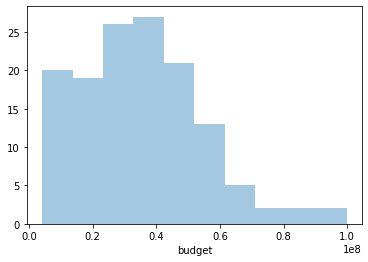

In [22]:
import seaborn as sns

sns.distplot(prod_companies_pop['budget'], kde=False)

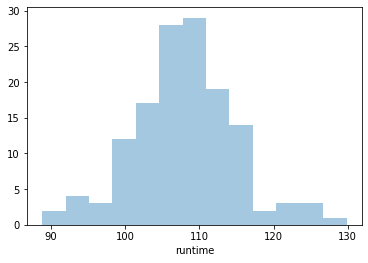

In [23]:
sns.distplot(prod_companies_pop['runtime'], kde=False)

TODO: Comparison of different genres for production houses